In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e34fbbc4e087e3dd94d997a8c45286f4


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
     
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    
    
   
       





Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | vaini
Processing Record 2 of Set 13 | albany
Processing Record 3 of Set 13 | marsh harbour
Processing Record 4 of Set 13 | haines junction
Processing Record 5 of Set 13 | coahuayana
Processing Record 6 of Set 13 | faya
Processing Record 7 of Set 13 | saint-joseph
Processing Record 8 of Set 13 | dikson
Processing Record 9 of Set 13 | sistranda
Processing Record 10 of Set 13 | nema
Processing Record 11 of Set 13 | bredasdorp
Processing Record 12 of Set 13 | ojinaga
Processing Record 13 of Set 13 | santa cruz
Processing Record 14 of Set 13 | jamestown
Processing Record 15 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 13 | nikolskoye
Processing Record 17 of Set 13 | souillac
Processing Record 18 of Set 13 | saint anthony
Processing Record 19 of Set 13 | mataura
Processing Record 20 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 13 | 

Processing Record 32 of Set 16 | ribeira grande
Processing Record 33 of Set 16 | tuktoyaktuk
Processing Record 34 of Set 16 | talnakh
Processing Record 35 of Set 16 | andenes
Processing Record 36 of Set 16 | hovd
Processing Record 37 of Set 16 | brownfield
Processing Record 38 of Set 16 | soyo
Processing Record 39 of Set 16 | carnarvon
Processing Record 40 of Set 16 | salina cruz
Processing Record 41 of Set 16 | portree
Processing Record 42 of Set 16 | pilao arcado
City not found. Skipping...
Processing Record 43 of Set 16 | halifax
Processing Record 44 of Set 16 | princeton
Processing Record 45 of Set 16 | singleton
Processing Record 46 of Set 16 | sao joao da barra
Processing Record 47 of Set 16 | mafinga
Processing Record 48 of Set 16 | sao filipe
Processing Record 49 of Set 16 | vila franca do campo
Processing Record 50 of Set 16 | chumikan
Processing Record 1 of Set 17 | tiksi
Processing Record 2 of Set 17 | fengrun
Processing Record 3 of Set 17 | puri
Processing Record 4 of Set 1

Processing Record 19 of Set 20 | clyde river
Processing Record 20 of Set 20 | iralaya
Processing Record 21 of Set 20 | baoying
Processing Record 22 of Set 20 | sur
Processing Record 23 of Set 20 | adrar
Processing Record 24 of Set 20 | ravar
Processing Record 25 of Set 20 | alugan
Processing Record 26 of Set 20 | ostrovnoy
Processing Record 27 of Set 20 | college
Processing Record 28 of Set 20 | magistralnyy
Processing Record 29 of Set 20 | provideniya
Processing Record 30 of Set 20 | scottsburgh
City not found. Skipping...
Processing Record 31 of Set 20 | borovskoy
Processing Record 32 of Set 20 | mayo
Processing Record 33 of Set 20 | oga
Processing Record 34 of Set 20 | codrington
Processing Record 35 of Set 20 | liuzhou
Processing Record 36 of Set 20 | mount isa
Processing Record 37 of Set 20 | kidal
Processing Record 38 of Set 20 | humaita
Processing Record 39 of Set 20 | sabya
Processing Record 40 of Set 20 | japura
Processing Record 41 of Set 20 | saint-francois
Processing Record

Processing Record 6 of Set 24 | san pedro
Processing Record 7 of Set 24 | colares
Processing Record 8 of Set 24 | micheweni
Processing Record 9 of Set 24 | lewistown
Processing Record 10 of Set 24 | posse
Processing Record 11 of Set 24 | nemuro
Processing Record 12 of Set 24 | garissa
Processing Record 13 of Set 24 | ola
Processing Record 14 of Set 24 | luderitz
Processing Record 15 of Set 24 | ongandjera
Processing Record 16 of Set 24 | nalut
Processing Record 17 of Set 24 | pitimbu
Processing Record 18 of Set 24 | caravelas
Processing Record 19 of Set 24 | male
Processing Record 20 of Set 24 | det udom
Processing Record 21 of Set 24 | quelimane
Processing Record 22 of Set 24 | putina
Processing Record 23 of Set 24 | palu
Processing Record 24 of Set 24 | redmond
Processing Record 25 of Set 24 | honavar
Processing Record 26 of Set 24 | verkhnevilyuysk
Processing Record 27 of Set 24 | maceio
Processing Record 28 of Set 24 | merauke
Processing Record 29 of Set 24 | kannod
Processing Reco

In [11]:
len(cities)

617

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.20,-175.20,84.20,79,40,16.11,TO,2020-12-24 00:15:27
1,Albany,42.60,-73.97,34.00,61,99,5.50,US,2020-12-24 00:13:37
2,Marsh Harbour,26.54,-77.06,73.62,73,44,17.38,BS,2020-12-24 00:15:28
3,Haines Junction,60.75,-137.51,20.08,93,31,3.20,CA,2020-12-24 00:15:28
4,Coahuayana,18.73,-103.68,86.00,45,5,4.25,MX,2020-12-24 00:15:28
5,Faya,18.39,42.45,55.40,87,0,1.79,SA,2020-12-24 00:15:28
6,Saint-Joseph,-21.37,55.62,75.20,73,0,6.93,RE,2020-12-24 00:15:28
7,Dikson,73.51,80.55,-11.16,89,100,9.69,RU,2020-12-24 00:15:29
8,Sistranda,63.73,8.83,39.20,80,40,14.99,NO,2020-12-24 00:15:29
9,Nema,57.51,50.50,11.50,97,100,5.10,RU,2020-12-24 00:15:29


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp","Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,TO,2020-12-24 00:15:27,-21.20,-175.20,84.20,79,40,16.11
1,Albany,US,2020-12-24 00:13:37,42.60,-73.97,34.00,61,99,5.50
2,Marsh Harbour,BS,2020-12-24 00:15:28,26.54,-77.06,73.62,73,44,17.38
3,Haines Junction,CA,2020-12-24 00:15:28,60.75,-137.51,20.08,93,31,3.20
4,Coahuayana,MX,2020-12-24 00:15:28,18.73,-103.68,86.00,45,5,4.25
...,...,...,...,...,...,...,...,...,...
567,Ust-Kan,RU,2020-12-24 00:17:18,50.93,84.76,5.63,87,78,8.43
568,Lebowakgomo,ZA,2020-12-24 00:17:19,-24.20,29.50,73.40,77,0,2.24
569,Ajdabiya,LY,2020-12-24 00:17:19,30.76,20.23,56.28,76,0,6.69
570,Rockingham,US,2020-12-24 00:17:19,42.97,-71.10,30.99,61,97,3.20


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

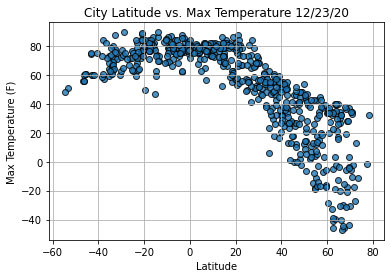

In [16]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

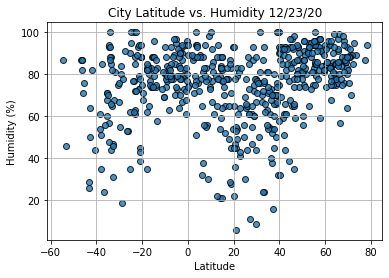

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()